<a href="https://colab.research.google.com/github/MHaley206265/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Matt_Haley_DSPT6_233_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [0]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [0]:
stars = pd.read_csv('pulsar_stars.csv')

stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
stars.shape

(17898, 9)

In [0]:
stars['target_class'].value_counts(normalize=True)

0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [0]:
train, test = train_test_split(stars, test_size=.2, random_state=42, stratify=stars['target_class'])

train.shape, test.shape

((14318, 9), (3580, 9))

In [0]:
train, val = train_test_split(train, test_size=.2, random_state=42, stratify=train['target_class'])

In [0]:
train.shape, val.shape, test.shape

((11454, 9), (2864, 9), (3580, 9))

In [0]:
target = 'target_class'
features = list(stars.drop(columns=target).columns)

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [0]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

# profile

In [0]:
pipe = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

In [0]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(boo...ap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                       

In [0]:
pipe.score(X_val, y_val)

0.9766061452513967

In [0]:
# Looking at feature importances
ranforclass = pipe.named_steps['randomforestclassifier']

feat_imp = list(ranforclass.feature_importances_)

In [0]:
feat_imp_df = pd.DataFrame(feat_imp, index=features)

In [0]:
feat_imp_df = feat_imp_df.rename(columns={0:'values'})
feat_imp_df = feat_imp_df.sort_values(ascending=False, by='values')

In [0]:
feat_imp_df

,values
Excess kurtosis of the integrated profile,0.356936
Skewness of the integrated profile,0.219918
Mean of the integrated profile,0.154660
Mean of the DM-SNR curve,0.074199
Standard deviation of the DM-SNR curve,0.065128
Standard deviation of the integrated profile,0.046471
Skewness of the DM-SNR curve,0.043042
Excess kurtosis of the DM-SNR curve,0.039645


In [0]:
feat_imp_df['values'] = feat_imp_df['values'] * 100
feat_imp_df

,values
Excess kurtosis of the integrated profile,35.693635
Skewness of the integrated profile,21.991752
Mean of the integrated profile,15.465991
Mean of the DM-SNR curve,7.419937
Standard deviation of the DM-SNR curve,6.512797
Standard deviation of the integrated profile,4.647127
Skewness of the DM-SNR curve,4.304241
Excess kurtosis of the DM-SNR curve,3.964520


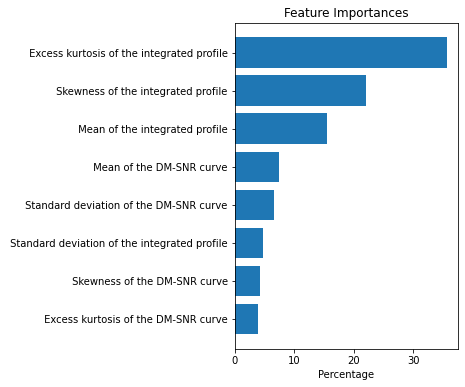

In [0]:
fig, ax = plt.subplots(figsize=(4, 6))
plt.barh(feat_imp_df.index, feat_imp_df['values'])
plt.title('Feature Importances')
ax.set_xlabel('Percentage')
ax.invert_yaxis()
plt.show()

In [0]:
y_pred_proba = pipe.predict_proba(X_val)[:, -1]

In [0]:
y_pred_proba

array([0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ])

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

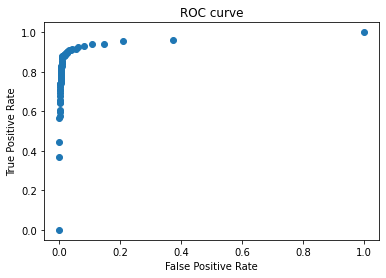

In [0]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [0]:
from sklearn.linear_model import LinearRegression

lin_pipe = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    LinearRegression()
)

In [0]:
lin_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
lin_pipe.score(X_val, y_val)

0.6805838589693154

In [0]:
# xgboost
from xgboost import XGBClassifier

In [0]:
boost_pipe = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

In [0]:
boost_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
      

In [0]:
from sklearn.metrics import accuracy_score

y_pred = boost_pipe.predict(X_val)
print(f'Val accuracy: {accuracy_score(y_val, y_pred)}')

Val accuracy: 0.9776536312849162


In [0]:
# confusion matrices